# **First project - Rain in Australia**



**Main objective:** Predict next-day rain by training classification models on the target variable *RainTomorrow*.

**Sub-targets:** Analyze the given data.
___

**Data source:** *https://www.kaggle.com/jsphyg/weather-dataset-rattle-package*

Observations were drawn from numerous weather stations. The daily observations are available from *http://www.bom.gov.au/climate/data*.

Definitions adapted from *http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml*.

Original data source: *http://www.bom.gov.au/climate/dwo/* and *http://www.bom.gov.au/climate/data*.

___

1. Import necessary libraries to analyze data and build machine learning model

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import sklearn.metrics as metrics

___
2. Import and explore dataset

In [77]:
data = pd.read_csv('weatherAUS.csv')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [78]:
# View dimensions of data
data.shape

(145460, 23)

In [79]:
# View column names
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [80]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [81]:
data.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
100372,2011-05-09,MountGambier,7.4,14.5,1.6,1.0,6.4,SSE,35.0,S,...,82.0,62.0,1025.5,1023.2,5.0,2.0,10.4,13.2,Yes,No
119497,2014-05-12,PerthAirport,11.1,23.5,0.0,1.6,5.4,S,50.0,N,...,88.0,61.0,1018.1,1017.0,6.0,8.0,15.4,21.5,No,Yes
140215,2011-08-09,Darwin,19.8,30.7,0.0,5.6,10.8,NNW,35.0,NE,...,74.0,43.0,1015.3,1011.4,5.0,1.0,25.8,29.4,No,No
66246,2014-11-15,MelbourneAirport,10.9,17.1,0.0,5.6,1.9,SW,35.0,SE,...,57.0,50.0,1013.6,1010.8,7.0,7.0,13.2,15.8,No,Yes
32925,2015-11-09,Sydney,13.7,23.3,0.0,6.4,12.3,E,30.0,W,...,59.0,48.0,1021.3,1017.5,5.0,1.0,19.5,21.8,No,No


In [7]:
# View summary of data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

The dataset contains two variable types: **object** and **float64**.
There are some missing values.

___

In [82]:
# Generate descriptive statistics for numerical variables (float64)
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [83]:
# Column Date will be replace with 3 new columns: Year, Month and Day.
data['Date'] = pd.to_datetime(data['Date'])
data['Year'], data['Month'], data['Day'] = data['Date'].dt.year, data['Date'].dt.month, data['Date'].dt.day
data.drop('Date', axis=1, inplace = True)
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

___
4. Checking missing values for dataset

In [11]:
# Checking missing values for our variables
data.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Year                 0
Month                0
Day                  0
dtype: int64

In [84]:
# For numerical variables, replace missing value with median
data['MinTemp'].fillna(data['MinTemp'].median(), inplace=True)
data['MaxTemp'].fillna(data['MaxTemp'].median(), inplace=True)
data['Rainfall'].fillna(data['Rainfall'].median(), inplace=True)
data['Evaporation'].fillna(data['Evaporation'].median(), inplace=True)
data['Sunshine'].fillna(data['Sunshine'].median(), inplace=True)
data['WindGustSpeed'].fillna(data['WindGustSpeed'].median(),inplace=True)
data['WindSpeed9am'].fillna(data['WindSpeed9am'].median(),inplace=True)
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].median(),inplace=True)
data['Humidity9am'].fillna(data['Humidity9am'].median(),inplace=True)
data['Humidity3pm'].fillna(data['Humidity3pm'].median(),inplace=True)
data['Pressure9am'].fillna(data['Pressure9am'].median(),inplace=True)
data['Pressure3pm'].fillna(data['Pressure3pm'].median(),inplace=True)
data['Cloud9am'].fillna(data['Cloud9am'].median(),inplace=True)
data['Cloud3pm'].fillna(data['Cloud3pm'].median(),inplace=True)
data['Temp9am'].fillna(data['Temp9am'].median(),inplace=True)
data['Temp3pm'].fillna(data['Temp3pm'].median(),inplace=True)

In [85]:
# For categorical variables, replace missing value with the value that appears most often
data['WindGustDir'].fillna(data['WindGustDir'].mode()[0], inplace=True)
data['WindDir9am'].fillna(data['WindDir9am'].mode()[0], inplace=True)
data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0], inplace=True)
data['RainToday'].fillna(data['RainToday'].mode()[0], inplace=True) 

In [86]:
data.isnull().sum()

Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow     3267
Year                0
Month               0
Day                 0
dtype: int64

___
4. **RainTomorrow** as target variable

In [87]:
data['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [16]:
#Counting missing values
data['RainTomorrow'].isnull().sum()

3267

In [88]:
# Removing rows with missing value in RainTomorrow column
data.dropna(subset=['RainTomorrow'], axis = 0, inplace = True)
# Check
data['RainTomorrow'].isnull().sum()

0

In [18]:
data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [19]:
# View dimensions of modified data
data.shape

(142193, 25)

In [20]:
data['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [21]:
data['RainTomorrow'].value_counts(normalize=True)

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

It rained on 22% of the recorded days.

___

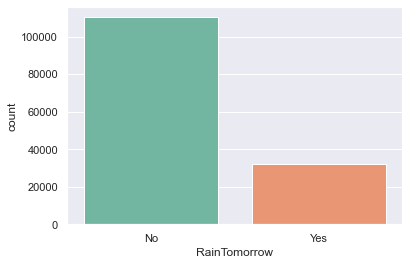

In [22]:
sns.set_theme(style="darkgrid")
sns.countplot(x="RainTomorrow",data=data, palette="Set2")
plt.show()

Bar graph shows the number of rainy dais and no rain days.


___
5. Sorting, grouping and filtering data

In [23]:
data.sort_values(['Location']) 
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,...,1007.1,8.0,5.0,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,...,1007.8,5.0,5.0,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,...,1008.7,5.0,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,...,1012.8,5.0,5.0,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [24]:
data.groupby('Year').describe()

MinTemp                                                      MaxTemp  \
        count       mean       std  min     25%   50%   75%   max    count   
Year                                                                         
2007     61.0  12.545902  3.002309  6.1  10.100  12.8  15.0  19.9     61.0   
2008   2246.0  12.473598  6.553566 -5.3   7.900  12.2  16.8  29.6   2246.0   
2009  16595.0  12.166725  6.171202 -8.5   7.700  12.0  16.6  33.9  16595.0   
2010  16419.0  12.122096  6.444028 -8.0   7.400  12.0  17.0  29.8  16419.0   
2011  15126.0  12.030682  6.402025 -8.2   7.525  12.0  16.7  29.1  15126.0   
2012  15044.0  11.239152  6.377533 -6.8   6.600  11.1  16.0  29.2  15044.0   
2013  16097.0  11.901056  6.170531 -6.5   7.600  11.6  16.1  29.4  16097.0   
2014  17400.0  12.396828  6.343347 -7.6   8.000  12.2  17.0  31.4  17400.0   
2015  17231.0  12.206181  6.536250 -8.2   7.450  12.1  17.0  31.9  17231.0   
2016  17508.0  12.483939  6.378481 -7.8   7.800  12.1  17.1  29.2  17508.0   
2017   8466.0  13.672809  6.555668 -5.9   9.200  13.7  18.6  31.4   8466.0   

                 ... Month            Day                                 \
           mean  ...   75%   max    count       mean       std  min  25%   
Year             ...                                                       
2007  25.086885  ...  12.0  12.0     61.0  15.754098  8.880045  1.0  8.0   
2008  22.915316  ...  12.0  12.0   2246.0  15.885574  8.847070  1.0  8.0   
2009  23.267068  ...  10.0  12.0  16595.0  15.719373  8.802310  1.0  8.0   
2010  22.611432  ...  10.0  12.0  16419.0  15.722273  8.797666  1.0  8.0   
2011  22.556836  ...  10.0  12.0  15126.0  15.765503  8.804384  1.0  8.0   
2012  22.360729  ...   9.0  11.0  15044.0  15.726469  8.801048  1.0  8.0   
2013  23.307716  ...  10.0  12.0  16097.0  15.810524  8.858655  1.0  8.0   
2014  23.780649  ...  10.0  12.0  17400.0  15.727816  8.798688  1.0  8.0   
2015  23.503581  ...  10.0  12.0  17231.0  15.717254  8.806636  1.0  8.0   
2016  23.352724  ...   9.0  12.0  17508.0  15.757197  8.811503  1.0  8.0   
2017  25.006532  ...   5.0   6.0   8466.0  15.237775  8.587374  1.0  8.0   

                        
       50%   75%   max  
Year                    
2007  16.0  23.0  31.0  
2008  16.0  24.0  31.0  
2009  16.0  23.0  31.0  
2010  16.0  23.0  31.0  
2011  16.0  23.0  31.0  
2012  16.0  23.0  31.0  
2013  16.0  23.0  31.0  
2014  16.0  23.0  31.0  
2015  16.0  23.0  31.0  
2016  16.0  23.0  31.0  
2017  15.0  22.0  31.0  

[11 rows x 144 columns]

In [25]:
data.filter(items =['MinTemp','MaxTemp']).describe()

,MinTemp,MaxTemp
count,142193.000000,142193.000000
mean,12.185565,23.225365
std,6.388936,7.109617
min,-8.500000,-4.800000
25%,7.600000,17.900000
50%,12.000000,22.600000
75%,16.800000,28.200000
max,33.900000,48.100000


In [89]:
# Creating new column - Diurnal temperature variation
data['DTempVar'] = data.MaxTemp - data.MinTemp
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,DTempVar
0,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,...,8.0,5.0,16.9,21.8,No,No,2008,12,1,9.5
1,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,...,5.0,5.0,17.2,24.3,No,No,2008,12,2,17.7
2,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,...,5.0,2.0,21.0,23.2,No,No,2008,12,3,12.8
3,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,...,5.0,5.0,18.1,26.5,No,No,2008,12,4,18.8
4,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,...,7.0,8.0,17.8,29.7,No,No,2008,12,5,14.8


In [27]:
# Let's take a look on the maximum diurnal temperature variation on each station
data.groupby('Location').max().DTempVar.sort_values(ascending=False)

Location
Woomera             31.4
MountGambier        31.2
SalmonGums          30.8
Williamtown         30.4
Dartmoor            29.8
PearceRAAF          29.8
Sale                29.7
Nuriootpa           29.1
Katherine           29.0
MelbourneAirport    29.0
Richmond            28.8
Watsonia            28.7
Uluru               28.7
Canberra            28.5
AliceSprings        28.5
Nhil                28.3
Ballarat            28.2
Portland            28.2
BadgerysCreek       28.0
Melbourne           27.7
Bendigo             27.6
Tuggeranong         27.5
Mildura             27.1
MountGinini         26.9
Penrith             26.8
WaggaWagga          26.6
Witchcliffe         26.5
Albany              26.3
Newcastle           26.2
Albury              26.1
PerthAirport        26.0
Moree               25.4
Adelaide            25.4
Perth               25.2
Launceston          24.2
Hobart              24.2
Sydney              24.1
SydneyAirport       23.7
Cobar               23.4
Walpole         

In [28]:
data.loc[data['DTempVar'] == 31.4]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,DTempVar
106972,Woomera,12.0,43.4,0.0,20.8,12.9,SSE,52.0,N,WNW,...,0.0,1.0,31.5,41.1,No,No,2013,1,11,31.4


___
6. Creating correlation matrix

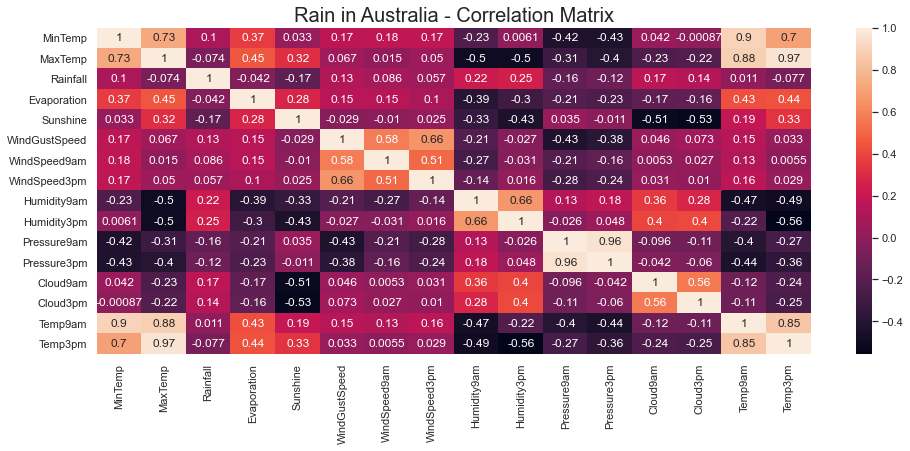

In [29]:
corrMatrix = data.iloc[:,1:21].corr() 
plt.figure(figsize = (16,6))
plt.title('Rain in Australia - Correlation Matrix', fontsize=20)
sns.heatmap(corrMatrix, annot=True)
plt.show()

The following variables are highly positively correlated:
* MinTemp and MaxTemp
* MinTemp and Temp9am
* MinTemp and Temp3pm
* MaxTemp and Temp9am
* MaxTemp and Temp3pm
* WindGustSpeed and WindSpeed3pm
* Humidity9am and Humidity3pm
* Pressure3pm and Pressure9am
* Temp3pm and Temp9am


___
7. Analyzing variables

Years 2007, 2008 and 2017 were excluded from analysis and graphs, as the data provided doesn't cover the entire year.

In [90]:
# Let's ignore year 2007, 2008 and 2017 as there are missing observation
data_new = data.loc[(data['Year'] >= 2009) & (data['Year'] <=2016)]
data_new

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,DTempVar
31,Albury,11.3,26.5,0.0,4.8,8.4,WNW,56.0,W,WNW,...,5.0,5.0,19.7,25.7,No,No,2009,1,1,15.2
32,Albury,9.6,23.9,0.0,4.8,8.4,W,41.0,WSW,SSW,...,5.0,5.0,14.9,22.1,No,No,2009,1,2,14.3
33,Albury,10.5,28.8,0.0,4.8,8.4,SSE,26.0,SSE,E,...,5.0,5.0,17.1,26.5,No,No,2009,1,3,18.3
34,Albury,12.3,34.6,0.0,4.8,8.4,WNW,37.0,SSE,NW,...,5.0,5.0,20.7,33.9,No,No,2009,1,4,22.3
35,Albury,12.9,35.8,0.0,4.8,8.4,WNW,41.0,ENE,NW,...,5.0,5.0,22.4,34.4,No,No,2009,1,5,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145279,Uluru,22.1,35.8,63.8,4.8,8.4,WNW,43.0,WNW,W,...,4.0,2.0,26.0,33.5,Yes,No,2016,12,27,13.7
145280,Uluru,22.6,36.8,0.0,4.8,8.4,NW,50.0,NW,W,...,5.0,5.0,29.7,34.0,No,No,2016,12,28,14.2
145281,Uluru,23.2,38.0,0.0,4.8,8.4,SSW,33.0,S,WSW,...,5.0,5.0,28.7,36.4,No,No,2016,12,29,14.8
145282,Uluru,19.7,37.0,0.0,4.8,8.4,E,37.0,ESE,W,...,5.0,5.0,28.2,35.1,No,No,2016,12,30,17.3


___
Let's find out more about the Rainfall variable.

In [31]:
# Rainfall
data_new.groupby('Year').describe().Rainfall

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2009,16595.0,2.148388,8.642119,0.0,0.0,0.0,0.6,371.0
2010,16419.0,2.669383,8.526820,0.0,0.0,0.0,1.0,165.2
2011,15126.0,2.787479,9.890135,0.0,0.0,0.0,1.0,367.6
2012,15044.0,2.381381,8.703119,0.0,0.0,0.0,0.6,183.4
2013,16097.0,2.243170,8.306295,0.0,0.0,0.0,0.6,208.5
2014,17400.0,1.931224,6.909084,0.0,0.0,0.0,0.4,175.2
2015,17231.0,2.117852,8.244962,0.0,0.0,0.0,0.6,247.2
2016,17508.0,2.350611,8.132431,0.0,0.0,0.0,0.8,225.0


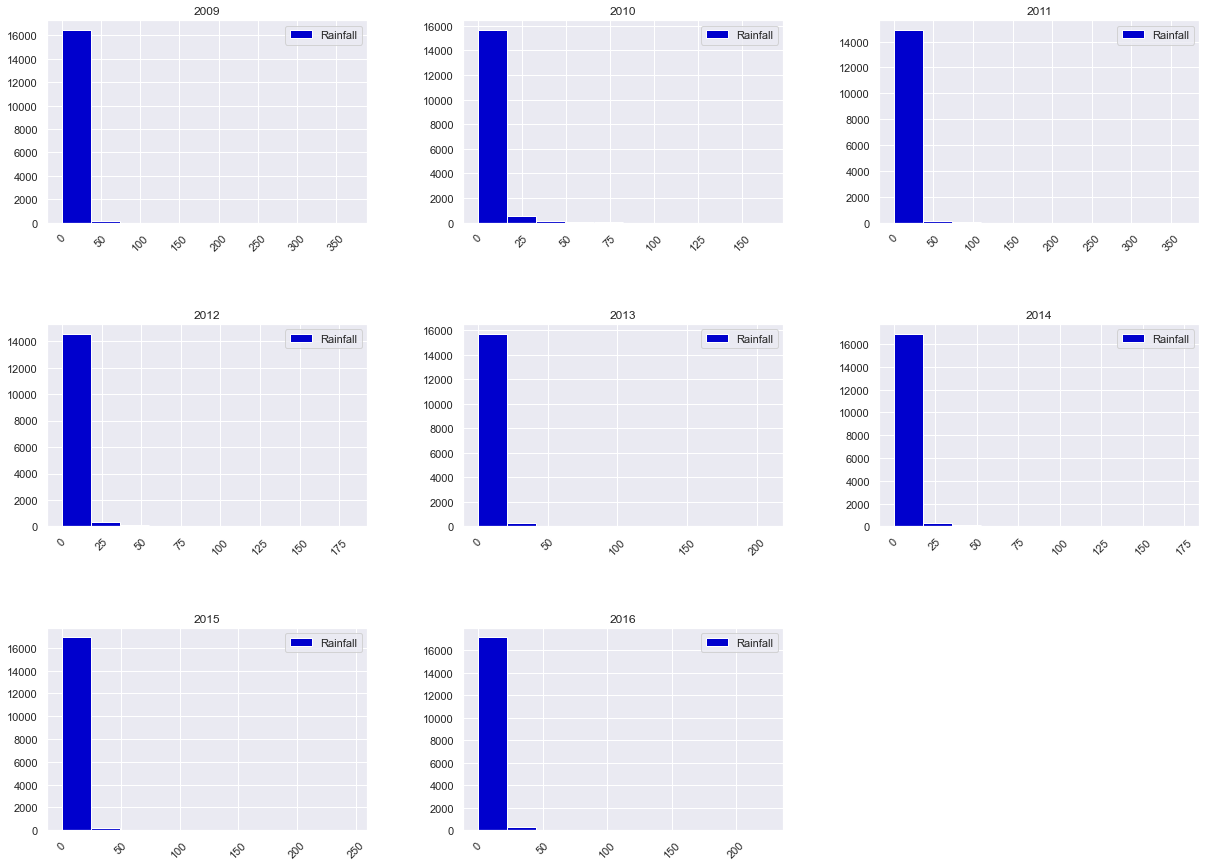

In [32]:
# Drawing the histogram of Rainfall.
data_new.hist(column='Rainfall', by='Year', bins=10, xrot=45,figsize=(20,15), legend=True, color='mediumblue');

Below graphs show the average of Rainfall grouping by years and months.

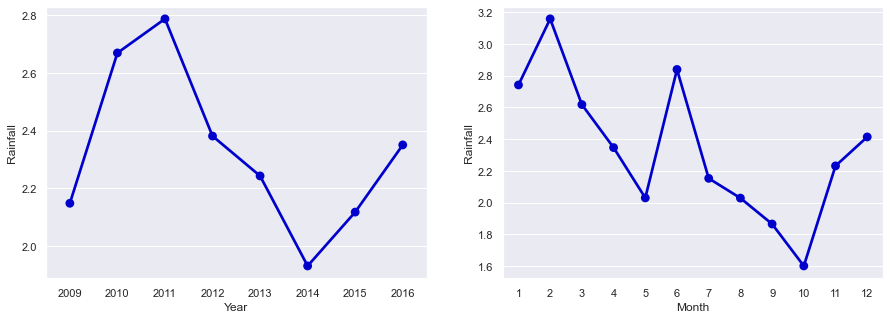

In [33]:
dfy = data_new[['Rainfall','Year']].groupby(["Year"]).mean().reset_index()
dfm = data_new[['Rainfall','Month']].groupby(["Month"]).mean().reset_index()
f, axes = plt.subplots(1, 2, figsize=(15,5))
sns.pointplot(x='Year', y='Rainfall', data=dfy, color="mediumblue",ax=axes[0]);
sns.pointplot(x='Month', y='Rainfall', data=dfm, color="mediumblue",ax=axes[1]);

Check if there is any relation between Cloud9am and Rainfall variables.

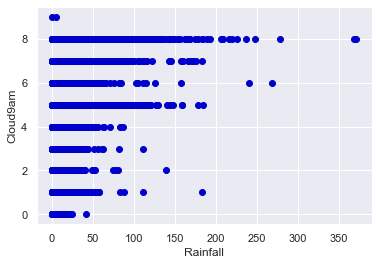

In [34]:
plt.scatter(data_new.Rainfall,data_new.Cloud9am,color="mediumblue")
plt.xlabel("Rainfall")
plt.ylabel("Cloud9am")
plt.show()

We see that Rainfall value increases when the Cloud9am value increases.

___
Let's take a look on Rainfall variable by Location.

In [35]:
data_new.groupby(["Location"]).describe().Rainfall

,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
Adelaide,2751.0,1.567648,4.616462,0.0,0.0,0.0,0.6,75.2
Albany,2820.0,2.303440,5.180136,0.0,0.0,0.0,1.9,49.4
Albury,2810.0,1.964626,6.360255,0.0,0.0,0.0,0.4,104.2
AliceSprings,2829.0,0.893319,4.523458,0.0,0.0,0.0,0.0,62.0
BadgerysCreek,2753.0,2.125754,7.354362,0.0,0.0,0.0,0.2,116.0
Ballarat,2821.0,1.677490,4.509510,0.0,0.0,0.0,1.2,58.6
Bendigo,2831.0,1.623172,5.153626,0.0,0.0,0.0,0.4,66.4
Brisbane,2807.0,3.112576,11.558213,0.0,0.0,0.0,0.6,182.6
Cairns,2781.0,5.622798,18.500533,0.0,0.0,0.0,2.2,278.4


In [36]:
# Find top 10 location when the average of Rainfall was the highest.
data_new.groupby(["Location"]).mean().Rainfall.sort_values(ascending=False).head(10)

Location
Cairns          5.622798
Darwin          4.948323
CoffsHarbour    4.880338
GoldCoast       3.603454
Wollongong      3.499103
Townsville      3.437328
NorahHead       3.275118
Sydney          3.256051
MountGinini     3.225778
Williamtown     3.208624
Name: Rainfall, dtype: float64

In [37]:
# Find top 10 location when the max of Rainfall was the highest.
data_new.groupby(["Location"]).max().Rainfall.sort_values(ascending=False).head(10)

Location
CoffsHarbour    371.0
Darwin          367.6
Cairns          278.4
Newcastle       240.0
Townsville      236.8
Williamtown     225.0
Wollongong      192.0
GoldCoast       183.4
Brisbane        182.6
Katherine       167.0
Name: Rainfall, dtype: float64

___
Let's take a look on the temperature in Australia.

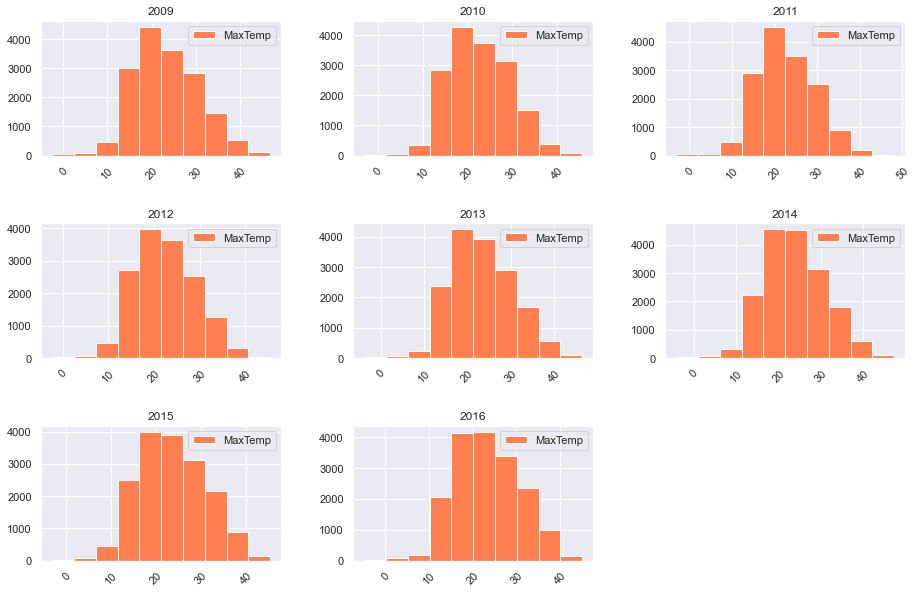

In [38]:
# Drawing the histogram of MaxTemp.
data_new.hist(column='MaxTemp', by='Year', bins=10, xrot=45,figsize=(15,10), legend=True, color='coral');

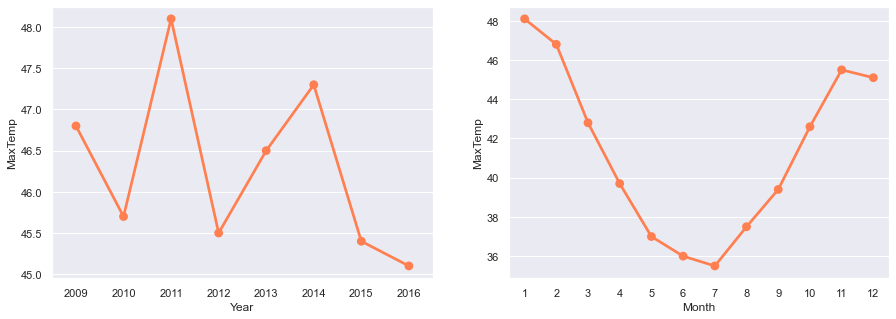

In [39]:
# Max of MaxTemp for each years and months excluding 2007, 2008 and 2017.
dfy = data_new[['MaxTemp','Year']].groupby(['Year']).max().reset_index()
dfm = data_new[['MaxTemp','Month']].groupby(['Month']).max().reset_index()
f, axes = plt.subplots(1, 2, figsize=(15,5))

sns.pointplot(x='Year', y='MaxTemp', data=dfy, color='coral', ax=axes[0]);
sns.pointplot(x='Month', y='MaxTemp', data=dfm, color='coral',ax=axes[1]);

Taking into account data from years 2009-2016, the highest temperature was reported in 2011.

Based on monthly analysis, the highest temeprature was reported in January.

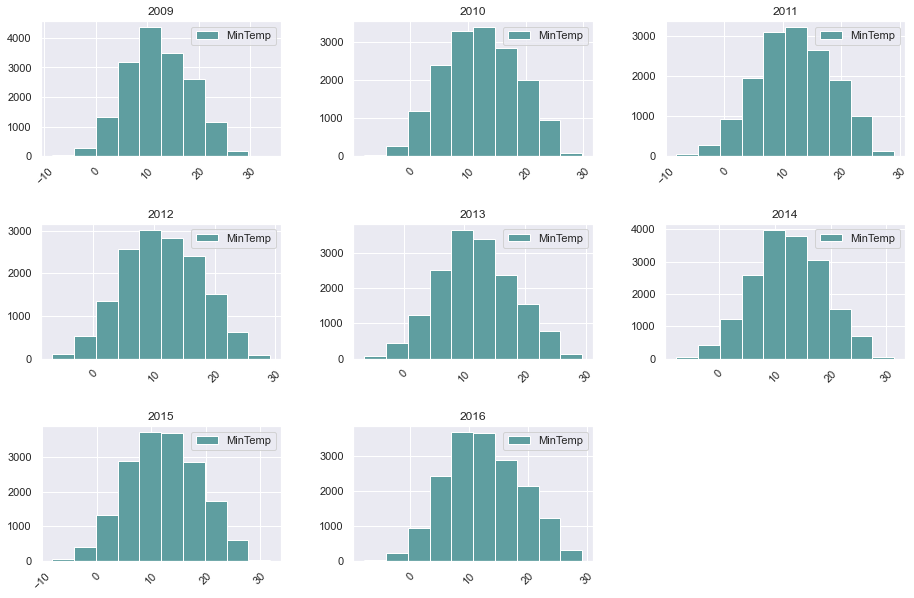

In [40]:
# Drawing the histogram of MinTemp.
data_new.hist(column='MinTemp', by='Year', bins=10, xrot=45,figsize=(15,10), legend=True, color='cadetblue');

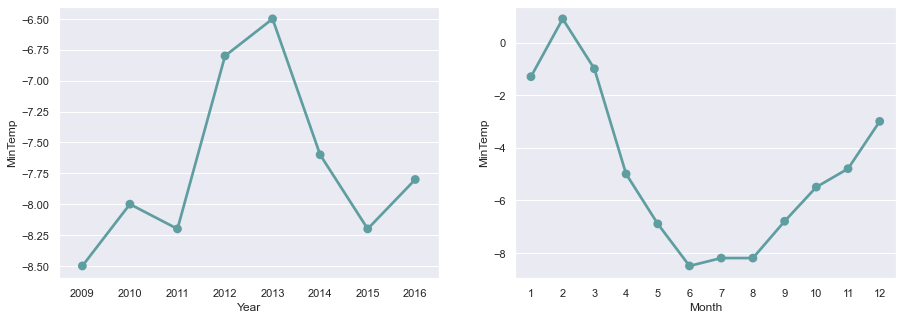

In [41]:
# Min of MinTemp group by years and months excluding 2007, 2008 and 2017.
dfy = data_new[['MinTemp','Year']].groupby(['Year']).min().reset_index()
dfm = data_new[['MinTemp','Month']].groupby(['Month']).min().reset_index()
f, axes = plt.subplots(1, 2, figsize=(15,5))

sns.pointplot(x='Year', y='MinTemp', data=dfy, color='cadetblue', ax=axes[0]);
sns.pointplot(x='Month', y='MinTemp', data=dfm, color='cadetblue', ax=axes[1]);

Taking into account data from years 2009-2016, the lowest temperature was reported in 2009.

Based on the temperature analysis, we can say that the coldest month are June and July. The highest temperature is in January and February.

___
Let's take a look on Sunshine variable.

In [42]:
data.describe().Sunshine

count    142193.000000
mean          7.994543
std           2.762195
min           0.000000
25%           8.200000
50%           8.400000
75%           8.700000
max          14.500000
Name: Sunshine, dtype: float64

Below graph show the average of Sunshine during the year (per months).

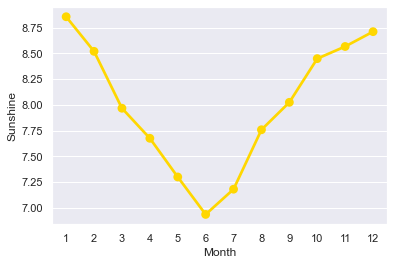

In [43]:
df = data_new[['Sunshine','Month']].groupby(["Month"]).mean().reset_index()
sns.pointplot(x='Month', y='Sunshine', data=df,color='gold');

The lowest Sunshine value is reported in the month of June. 

___
Below graph shows the correlation between two variables: Sunshine and Rainfall.

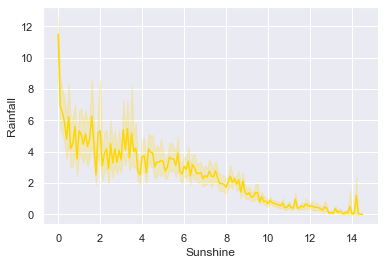

In [44]:
sns.lineplot(x='Sunshine', y='Rainfall', data=data_new, color='gold');

Rainfall value decreases when sunshine value increases.

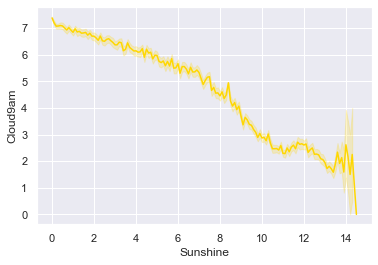

In [45]:
# Check if there is any correlation between Cloud9am and Sunhine variables
sns.lineplot(x='Sunshine', y='Cloud9am', data=data_new, color='gold');

___
Find out more about Wind in Australia.

Wind Speed is defined by the National Weather Service as a snapshot of the sustained wind speed in knots valid for the indicated hour.
Wind Gusts is defined as a quick and sudden increase in the speed of wind.

In [46]:
# Check the most often Wind direction
data_new['WindGustDir'].value_counts()

W      17615
SE      8514
N       8430
WSW     8333
E       8308
SSE     8267
S       8267
SW      8140
SSW     7839
WNW     7593
NW      7422
ENE     7351
ESE     6668
NE      6598
NNW     6067
NNE     6008
Name: WindGustDir, dtype: int64

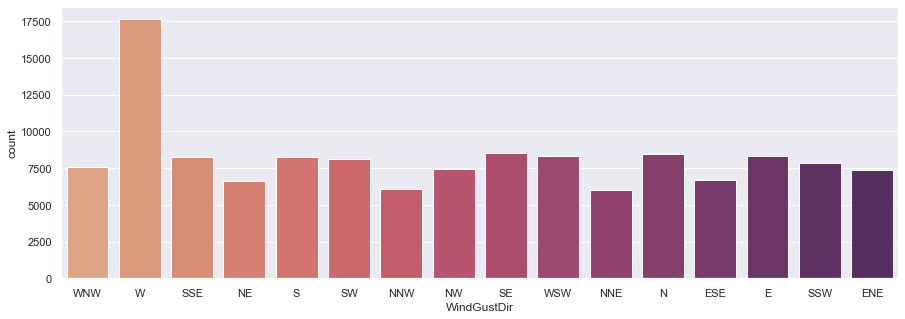

In [47]:
plt.figure(figsize=(15,5))
sns.countplot(x="WindGustDir",data=data_new, palette="flare")
plt.show()

In [48]:
data_new['WindDir9am'].value_counts()

N      19967
SE      8354
E       8252
SSE     8217
NW      8013
S       7834
W       7617
SW      7549
NNE     7407
NNW     7281
ENE     7168
NE      6992
ESE     6900
SSW     6824
WNW     6702
WSW     6343
Name: WindDir9am, dtype: int64

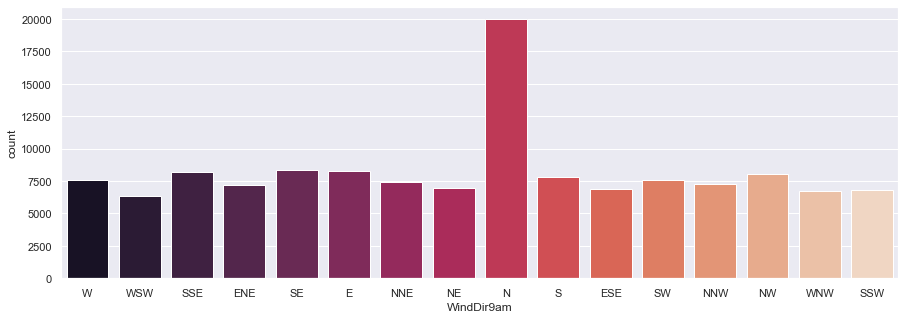

In [49]:
plt.figure(figsize=(15,5))
sns.countplot(x="WindDir9am",data=data_new, palette="rocket")
plt.show()

The most often Wind Gust direction is West. However the most often Wind 9am direction is North.

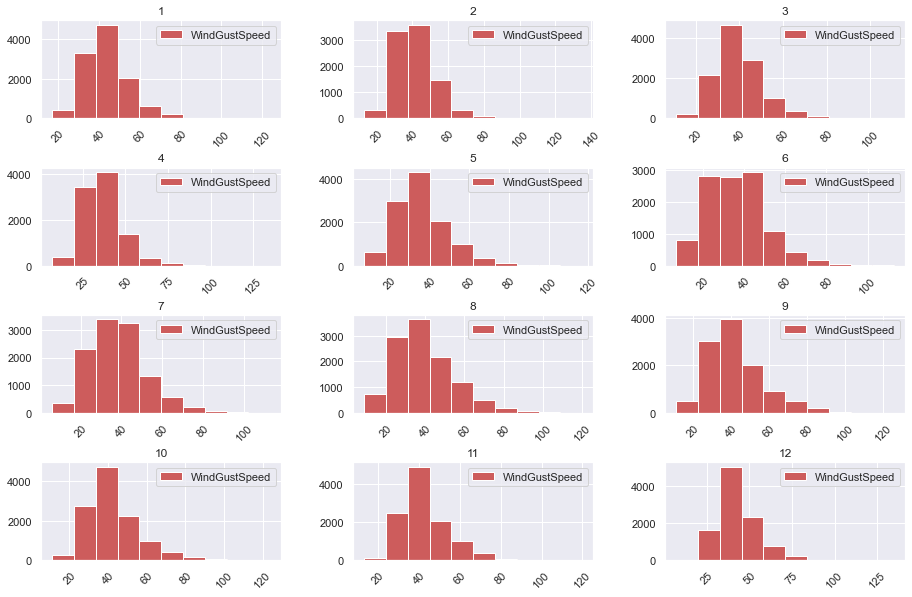

In [50]:
# Drawing the histogram of WindGustSpeed by month.
data_new.hist(column='WindGustSpeed', by='Month', bins=10, xrot=45,figsize=(15,10), legend=True, color='indianred');

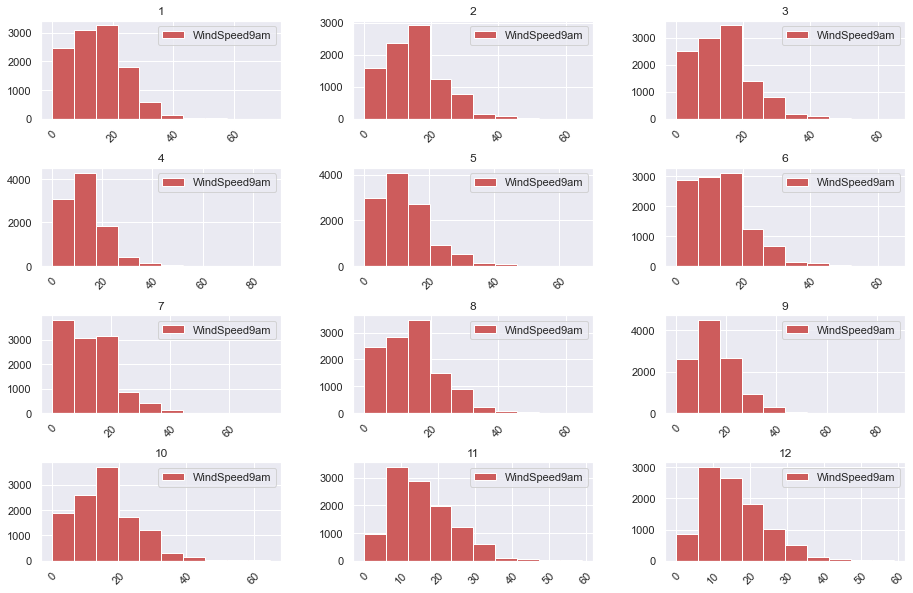

In [51]:
# Drawing the histogram of WindSpeed9am by month.
data_new.hist(column='WindSpeed9am', by='Month', bins=10, xrot=45,figsize=(15,10), legend=True, color='indianred');

Let's compare the average of WindSpeed9am and WindSpeed3pm values group by months.

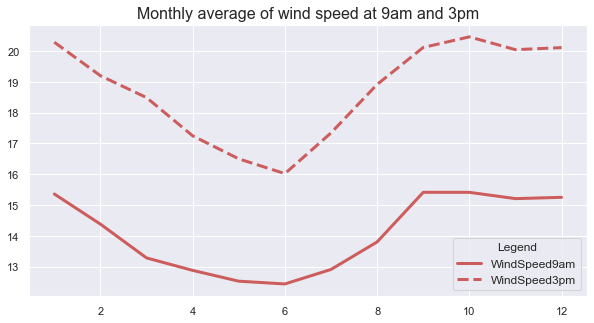

In [52]:
df9 = data_new[['WindSpeed9am','Month']].groupby(['Month']).mean().reset_index()
df3 = data_new[['WindSpeed3pm','Month']].groupby(['Month']).mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot('Month','WindSpeed9am', data=df9, marker='', color='indianred', linewidth=3)
plt.plot('Month','WindSpeed3pm', data=df3, marker='', color='indianred', linewidth=3, linestyle='dashed')
plt.title(label='Monthly average of wind speed at 9am and 3pm',fontsize=16)
plt.legend(fontsize='medium', title="Legend")
plt.show()

We see that the WindSpeed3pm values are higher than WindSpeed9am values.

In [53]:
# The highest speed of WindGustSpeed by Location.
data_new.groupby("Location").max().WindGustSpeed.sort_values(ascending=False).head(10)

Location
Woomera             135.0
NorahHead           135.0
Townsville          135.0
Hobart              130.0
Wollongong          126.0
Darwin              126.0
MelbourneAirport    122.0
Nhil                120.0
SydneyAirport       120.0
Sale                117.0
Name: WindGustSpeed, dtype: float64

In [54]:
# The highest speed of Wind9am by Location.
data_new.groupby("Location").max().WindSpeed9am.sort_values(ascending=False).head(10)

Location
Wollongong          87.0
NorahHead           87.0
Newcastle           83.0
GoldCoast           72.0
SydneyAirport       69.0
MelbourneAirport    67.0
Albany              65.0
Townsville          65.0
Darwin              63.0
Melbourne           63.0
Name: WindSpeed9am, dtype: float64

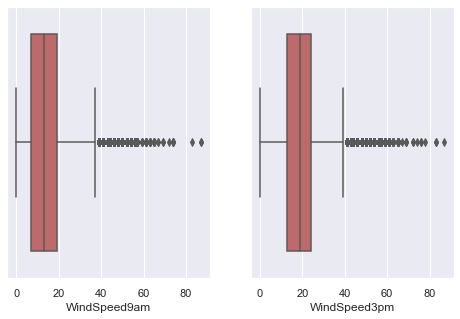

In [55]:
# Checking outliers for variables: WindSpeed9am and WindSpeed3pm
f, axes = plt.subplots(1, 2, figsize=(8,5))
sns.boxplot(x='WindSpeed9am', data=data_new,  orient='h' , color = 'indianred', ax=axes[0])
sns.boxplot(x='WindSpeed3pm', data=data_new,  orient='h' , color = 'indianred', ax=axes[1]);

___
Let's analyze air properties: humidity and pressure.

In [56]:
data_new.filter(items =['Humidity9am','Humidity3pm','Pressure9am','Pressure3pm']).describe()

,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm
count,131420.000000,131420.000000,131420.000000,131420.000000
mean,68.761102,51.514397,1017.643346,1015.246949
std,18.981592,20.591057,6.719372,6.655456
min,0.000000,0.000000,980.500000,977.100000
25%,57.000000,37.000000,1013.600000,1011.100000
50%,70.000000,52.000000,1017.600000,1015.200000
75%,83.000000,65.000000,1021.800000,1019.400000
max,100.000000,100.000000,1041.000000,1039.600000


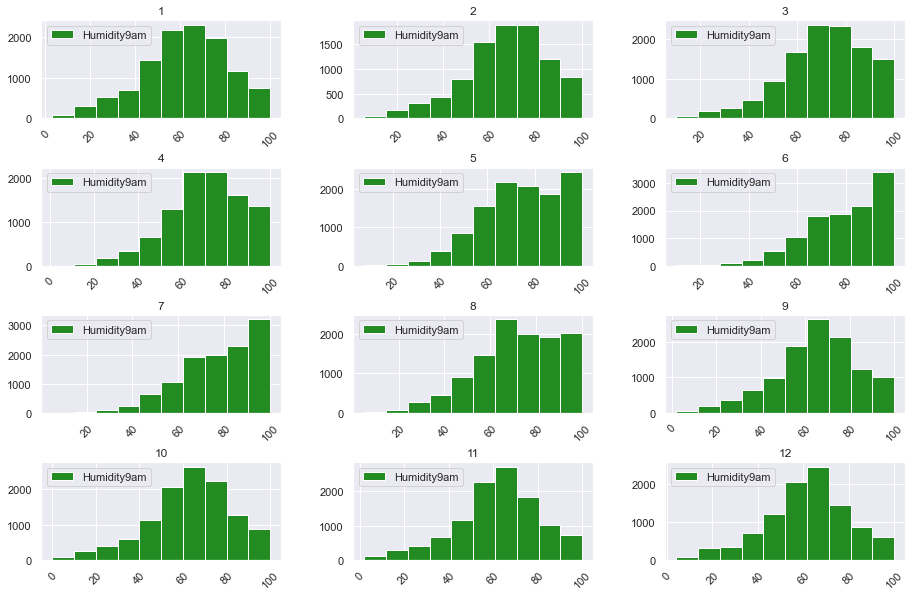

In [57]:
data_new.hist(column='Humidity9am', by='Month', bins=10, xrot=45,figsize=(15,10), legend=True, color='forestgreen');

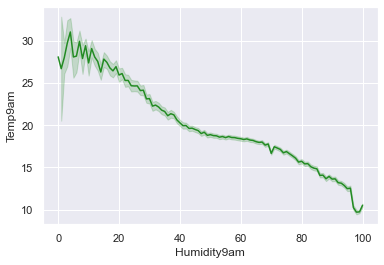

In [58]:
sns.lineplot(x='Humidity9am', y='Temp9am', data=data_new, color='forestgreen');

Humidity9am value increases when the Temp9am value decreases.

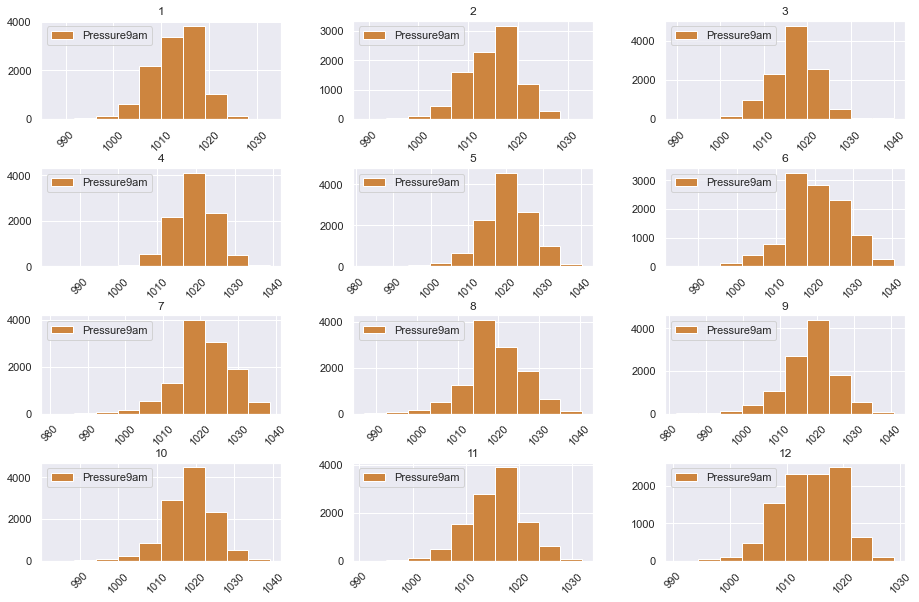

In [59]:
data_new.hist(column='Pressure9am', by='Month', bins=10, xrot=45,figsize=(15,10), legend=True, color='peru');

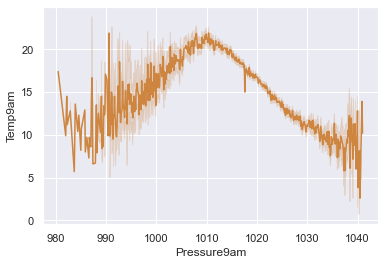

In [60]:
sns.lineplot(x='Pressure9am', y='Temp9am', data=data_new, color='peru');

___
Interactive graphs for MaxTemp and MinTemp

In [61]:
df = data_new[['MaxTemp','Month']].groupby(['Month']).max().reset_index()
from bqplot import pyplot as bplt
fig = bplt.figure(title="Maximum temperature by month in Australia",background_style={'fill': 'lightgrey'},title_style={'font-size': '18px','fill': 'Coral'})
fig.layout.height = "400px"
fig.layout.width = "600px"
bplt.plot(x=df['Month'], y=df['MaxTemp'],colors=['coral'])
bplt.xlabel("Month")
bplt.ylabel("MaxTemp")
bplt.show()

In [62]:
df = data_new[['MinTemp','Month']].groupby(['Month']).min().reset_index()
fig = bplt.figure(title="Minimum temperature by month in Australia",background_style={'fill': 'lightgrey'},title_style={'font-size': '18px','fill': 'Cadetblue'})
fig.layout.height = "400px"
fig.layout.width = "600px"
bplt.plot(x=df['Month'], y=df['MinTemp'], colors=['Cadetblue'])
bplt.xlabel("Month")
bplt.ylabel("MinTemp")
bplt.show()

___
Interactive dashboard to check the average maximum and minimum temperature in Australia.

In [91]:
import dash
from jupyter_dash import JupyterDash
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go
import pandas as pd
import plotly.express as px

df1 = data_new[['MaxTemp','Month']].groupby(['Month']).mean().reset_index()
df2 = data_new[['MinTemp','Month']].groupby(['Month']).mean().reset_index()
df3 = data_new[['Rainfall','Month']].groupby(['Month']).mean().reset_index()

trace1 = go.Scatter(
                    x = df1.Month,
                    y = df1.MaxTemp,
                    mode = "lines+markers",
                    name = "MaxTemp by month",
                    marker = dict(color = 'coral'),
                    text= "Max temp")
trace2 = go.Scatter(
                    x = df2.Month,
                    y = df2.MinTemp,
                    mode = "lines+markers",
                    name = "MinTemp by month",
                    marker = dict(color = 'cadetblue'),
                    text= "Min temp")

data_t=[trace1, trace2]
layout = dict(title = 'Average temperature in Australia',
              xaxis= dict(title= 'Month',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Temperature',ticklen= 5,zeroline= False)
             )

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)
app.layout = html.Div(children=[
    html.H1(children='Maximum and minimum temperature by months in Australia'),
    html.Div(children='''Check what is the average max and min temperature in Australia... And choose the best month to visit it!'''),
    dcc.Graph(
        id='example-graph',
        figure={
            'data': data_t,
            'layout': layout
            
        })
])

app.run_server(mode='inline')

___
Linear regression for Rainfall and Cloud9am

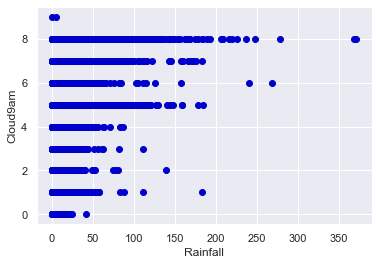

In [64]:
plt.scatter(data_new.Rainfall,data_new.Cloud9am,color="mediumblue")
plt.xlabel("Rainfall")
plt.ylabel("Cloud9am")
plt.show()

In [65]:
x = data_new['Rainfall'].values[:,np.newaxis]
y = data_new['Cloud9am'].values

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

r2 = metrics.r2_score(y, y_pred)
print('r2: ', r2) 
mae = metrics.mean_absolute_error(y, y_pred)
print('MAE: ', mae)
mse = metrics.mean_squared_error(y, y_pred) 
print('MSE: ', mse)
print('RMSE: ', np.sqrt(mse))

r2:  0.02728455155731968
MAE:  1.7836895702324416
MSE:  5.139948390866105
RMSE:  2.267145427815804


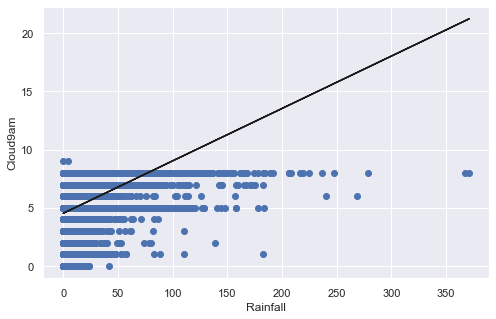

In [66]:
plt.figure(figsize=(8,5))
plt.scatter(x, y)
plt.plot(x, y_pred, 'k')
plt.xlabel("Rainfall")
plt.ylabel("Cloud9am")
plt.show()

___
Ordinary Least Squares (OLS)

Let's try to predict MaxTemp value during the day based on variables Temp9am, Evaporation and Sunshine.

In [94]:
df = data_new.loc[data_new['Year'] == 2015]

In [95]:
x = df[['Temp9am', 'Humidity9am','Evaporation']]
x = sm.add_constant(x)
y = df['MaxTemp']
model = sm.OLS(y, x, missing='drop')
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                MaxTemp   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                 2.513e+04
Date:                Fri, 09 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:39:27   Log-Likelihood:                -44591.
No. Observations:               17231   AIC:                         8.919e+04
Df Residuals:                   17227   BIC:                         8.922e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.3639      0.155     67.021      

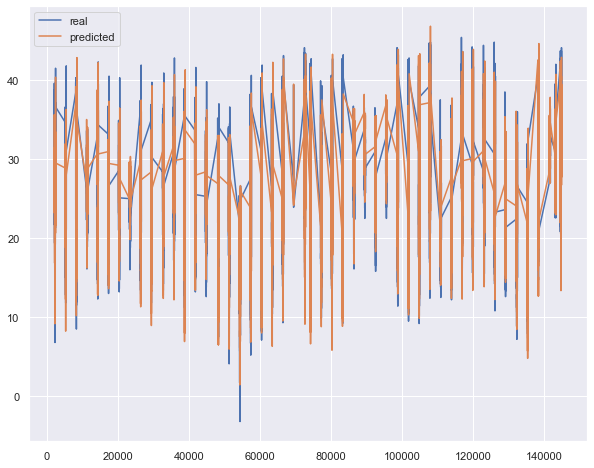

In [96]:
plt.figure(figsize=(10,8))
plt.plot(y, label="real")
plt.plot(result.fittedvalues, label="predicted")
plt.legend();

___
Let's take a look on the rows when RainTomorrow is Yes (1)

In [97]:
data_rd = data.loc[(data['RainTomorrow'] == 'Yes')]
data_rd

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,DTempVar
8,Albury,9.7,31.9,0.0,4.8,8.4,NNW,80.0,SE,NW,...,5.0,5.0,18.3,30.2,No,Yes,2008,12,9,22.2
10,Albury,13.4,30.4,0.0,4.8,8.4,N,30.0,SSE,ESE,...,5.0,5.0,20.4,28.8,No,Yes,2008,12,11,17.0
11,Albury,15.9,21.7,2.2,4.8,8.4,NNE,31.0,NE,ENE,...,8.0,8.0,15.9,17.0,Yes,Yes,2008,12,12,5.8
12,Albury,15.9,18.6,15.6,4.8,8.4,W,61.0,NNW,NNW,...,8.0,8.0,17.4,15.8,Yes,Yes,2008,12,13,2.7
16,Albury,14.1,20.9,0.0,4.8,8.4,ENE,22.0,SSW,E,...,8.0,1.0,17.2,18.1,No,Yes,2008,12,17,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145324,Uluru,24.8,39.8,0.4,4.8,8.4,WNW,65.0,E,ENE,...,5.0,5.0,31.5,36.6,No,Yes,2017,2,10,15.0
145390,Uluru,19.3,24.4,0.0,4.8,8.4,W,35.0,ESE,SSE,...,8.0,8.0,21.3,18.5,No,Yes,2017,4,17,5.1
145391,Uluru,15.2,21.5,6.8,4.8,8.4,ENE,30.0,NE,ENE,...,3.0,8.0,19.0,21.2,Yes,Yes,2017,4,18,6.3
145392,Uluru,17.7,26.9,12.6,4.8,8.4,S,35.0,E,SSW,...,7.0,8.0,19.0,26.0,Yes,Yes,2017,4,19,9.2


In [98]:
data_rd['RainToday'].value_counts(normalize=True)

No     0.542084
Yes    0.457916
Name: RainToday, dtype: float64

In 54% cases, there was no rain before the rain days. 

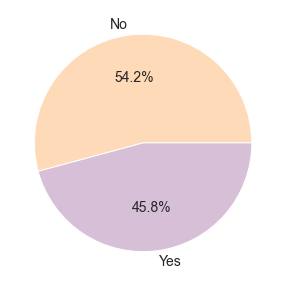

In [99]:
plt.figure(figsize=(5,5))
plt.pie(data_rd['RainToday'].value_counts(), labels=data_rd['RainToday'].unique(), autopct='%1.1f%%',textprops={'fontsize': 14},colors=["peachpuff","thistle"]);

In [100]:
data_rd.filter(items =['MinTemp','MaxTemp','Temp9am','Temp3pm']).describe()

,MinTemp,MaxTemp,Temp9am,Temp3pm
count,31877.000000,31877.000000,31877.000000,31877.000000
mean,13.180375,21.121655,16.676817,19.241406
std,6.301215,6.905793,6.348251,6.586286
min,-7.200000,-4.100000,-5.500000,-4.400000
25%,8.500000,16.100000,11.900000,14.500000
50%,12.700000,20.200000,16.200000,18.600000
75%,17.900000,25.800000,21.100000,23.400000
max,30.700000,46.800000,37.500000,46.100000


In [101]:
data_rd.filter(items =['Sunshine','Cloud9am','Cloud3pm']).describe()

,Sunshine,Cloud9am,Cloud3pm
count,31877.000000,31877.000000,31877.000000
mean,6.327129,5.711610,5.865608
std,3.130632,1.859035,1.685792
min,0.000000,0.000000,0.000000
25%,4.000000,5.000000,5.000000
50%,8.400000,5.000000,5.000000
75%,8.400000,7.000000,7.000000
max,13.900000,8.000000,8.000000


In [102]:
data_rd.filter(items =['Evaporation','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm']).describe()

,Evaporation,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm
count,31877.000000,31877.000000,31877.000000,31877.000000,31877.000000
mean,4.647489,77.849578,68.291966,1014.711497,1012.583945
std,2.600055,16.005708,18.966811,7.004275,7.017440
min,0.000000,5.000000,1.000000,980.500000,977.100000
25%,3.400000,68.000000,55.000000,1010.200000,1008.000000
50%,4.800000,80.000000,69.000000,1015.300000,1013.200000
75%,4.800000,91.000000,83.000000,1018.700000,1016.600000
max,74.800000,100.000000,100.000000,1039.500000,1036.900000


In [103]:
# Check the Wind direction and speed
data_rd['WindGustDir'].value_counts(normalize=True)

W      0.159174
N      0.076921
NW     0.071650
WNW    0.071368
WSW    0.065408
S      0.063274
SSW    0.059510
NNW    0.058443
SW     0.056593
SSE    0.055055
SE     0.054365
NNE    0.046460
E      0.042350
NE     0.041378
ENE    0.040405
ESE    0.037645
Name: WindGustDir, dtype: float64

In [104]:
data_rd['WindDir3pm'].value_counts(normalize=True)

SE     0.096747
W      0.079305
N      0.075948
WNW    0.075289
NW     0.075070
NNW    0.068576
WSW    0.065659
S      0.065094
SW     0.056718
SSW    0.056122
SSE    0.054899
NNE    0.049471
NE     0.048342
E      0.044829
ESE    0.044578
ENE    0.043354
Name: WindDir3pm, dtype: float64

Before the rainy days, the most common wind gust direction was West. The most common wind 3pm direction was from South-East.

In [106]:
data_rd.filter(items = ['WindGustSpeed','WindSpeed9am','WindSpeed3pm']).describe()

,WindGustSpeed,WindSpeed9am,WindSpeed3pm
count,31877.000000,31877.000000,31877.00000
mean,45.414594,15.481821,20.05540
std,15.216477,9.559830,9.67781
min,7.000000,0.000000,0.00000
25%,35.000000,9.000000,13.00000
50%,43.000000,15.000000,19.00000
75%,54.000000,20.000000,26.00000
max,135.000000,87.000000,87.00000


Before the rainy days, the WindSpeed doesn't exceed 87. The average windspeed was 15-20. Wind Gust's speed reaches even 135.

___
8. Building a model to predict on next day

Binary Logistic Regression is used to build the model.
The output of Logistic Regression is a Categorical value such as 0 or 1 / No or Yes.

In [107]:
# Cleaning data
data1 = data.drop(columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Year','Month','Day','DTempVar'], axis=1)
data1.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [108]:
# Converting type of target variable and RainToday (Yes->1, No->0)
data1.RainTomorrow.replace(('Yes', 'No'), (1, 0), inplace=True)
data1.RainToday.replace(('Yes', 'No'), (1, 0), inplace=True)

In [109]:
#Check
data1['RainTomorrow'].unique()

array([0, 1], dtype=int64)

In [110]:
data1['RainToday'].unique()

array([0, 1], dtype=int64)

In [111]:
# Excluding RainTomorrow's Prediction - Declaring feature vector and target variable
x_data = data1.drop(['RainTomorrow'], axis=1)
y = data1['RainTomorrow']

In [112]:
x_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0


In [113]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64

In [114]:
#Feature scalling - to show variables as values from O to 1
X = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
X.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,0.516509,0.523629,0.001617,0.033103,0.57931,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.555556,0.508439,0.522073,0.0
1,0.375000,0.565217,0.000000,0.033103,0.57931,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.555556,0.555556,0.514768,0.570058,0.0
2,0.504717,0.576560,0.000000,0.033103,0.57931,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.555556,0.222222,0.594937,0.548944,0.0
3,0.417453,0.620038,0.000000,0.033103,0.57931,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.555556,0.555556,0.533755,0.612284,0.0
4,0.613208,0.701323,0.002695,0.033103,0.57931,0.271318,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,0.0


In [115]:
# Spliting data into separate training set (80%) and test set (20%)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [116]:
# Check the shape of X_train and X_test

X_train.shape, X_test.shape

((113754, 17), (28439, 17))

In [117]:
#Model training
model = LogisticRegression(solver='liblinear', random_state=0)

In [118]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [119]:
#Predict results
y_pred_test = model.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [120]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('Accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print('Precision: {0:0.4f}'. format(precision_score(y_test, y_pred_test)))
print('Recall: {0:0.4f}'. format(recall_score(y_test, y_pred_test)))

Accuracy: 0.8449
Precision: 0.7263
Recall: 0.4936


___
Confusion matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm.  It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

In [121]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix

conf_m = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', conf_m)

Confusion matrix

 [[20882  1185]
 [ 3227  3145]]


In [122]:
print('\nTrue Positives = ', conf_m[0,0])
print('\nTrue Negatives = ', conf_m[1,1])
print('\nFalse Positives= ', conf_m[0,1])
print('\nFalse Negatives = ', conf_m[1,0])


True Positives =  20882

True Negatives =  3145

False Positives=  1185

False Negatives =  3227


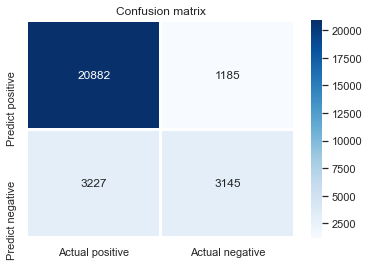

In [123]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.figure(figsize=(6,4))
plt.title ("Confusion matrix")
sns.heatmap(conf_m, cmap= 'Blues', annot = True, annot_kws = {'size':12},fmt='d', linewidths=2, xticklabels = ['Actual positive', 'Actual negative'], yticklabels=['Predict positive','Predict negative']);

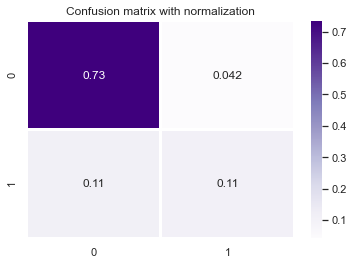

In [124]:
plt.subplots(figsize=(6,4))
plt.title ("Confusion matrix with normalization")
sns.heatmap(conf_m/np.sum(conf_m), cmap='Purples', annot = True, annot_kws = {'size':12}, linewidths=2);

___
ROC Curve

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

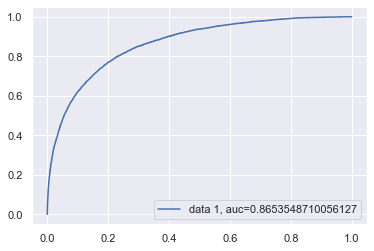

In [127]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4);

AUC score for the case is 0.86. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.